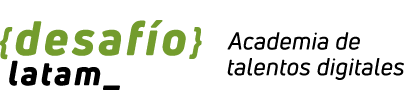

#<center><font color="green">Regresión (parte I)</font></center>

##<font color="green">Matriz de correlaciones</font>

Python nos permite determinar fácilmente las correlaciones entre cada par de variables contenidas en un dataset. En nuestro caso, utilizaremos los datos correspondientes a la base de datos de los pingüinos que vimos en la sesión anterior.


In [1]:
#cargamos las bibliotecas y la data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing


In [2]:
# Cargar el conjunto de datos de pingüinos de seaborn
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
# Filtrar los datos sin valores faltantes
data = penguins.dropna()
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
data = data[["bill_length_mm",	"bill_depth_mm",	"flipper_length_mm", "body_mass_g"]]

In [5]:
data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


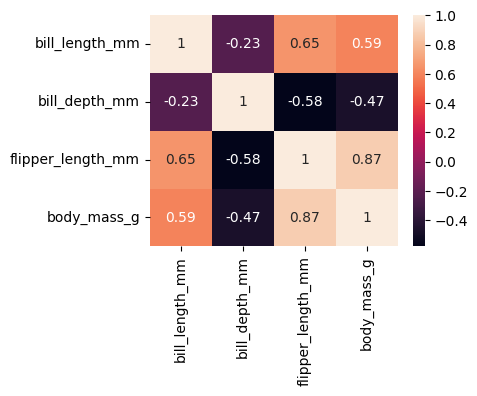

In [6]:
plt.figure(figsize=(4,3))
sns.heatmap(data.corr(), annot=True)
plt.show()

##<font color="green">Regresión lineal simple</font>


Vamos a analizar, a partir de nuestra base de datos, las posibles relaciones entre las variables que presenta.

In [13]:
# Filtrar las columnas necesarias
data2 = data[["flipper_length_mm", "body_mass_g"]]

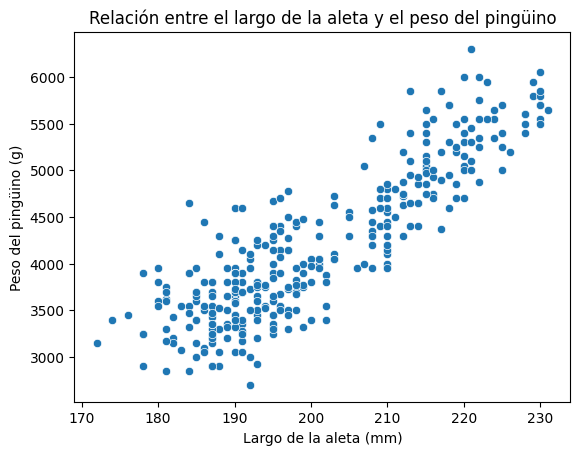

In [14]:
# Crear una gráfica de dispersión
sns.scatterplot(x="flipper_length_mm", y="body_mass_g", data=data2)
plt.title("Relación entre el largo de la aleta y el peso del pingüino")
plt.xlabel("Largo de la aleta (mm)")
plt.ylabel("Peso del pingüino (g)")
plt.show()

Intuitivamente, parece haber una correlación lineal positiva que verificaremos a continuación.

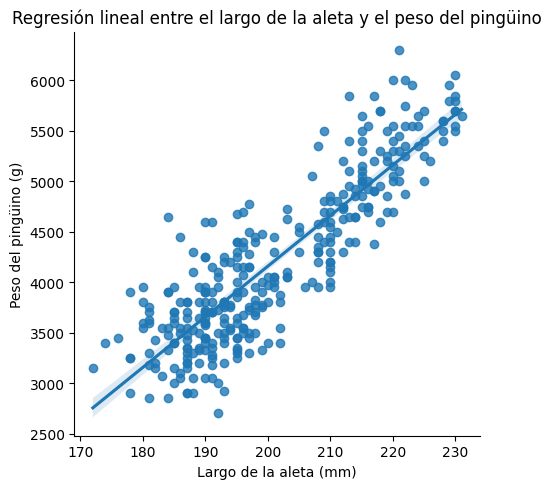

In [15]:
# Realizar la regresión lineal
sns.lmplot(x="flipper_length_mm", y="body_mass_g", data=data)
plt.title("Regresión lineal entre el largo de la aleta y el peso del pingüino")
plt.xlabel("Largo de la aleta (mm)")
plt.ylabel("Peso del pingüino (g)")

# Calcular los valores de la regresión lineal. Ya veremos el significado de los parámetros
slope, intercept, r_value, p_value, std_err = stats.linregress(data["flipper_length_mm"], data["body_mass_g"])

# Mostrar el gráfico completo
plt.tight_layout()
plt.show()


##<font color = 'green'>Modelo de regresión lineal con Statsmodels</font>

Utilizaremos un módulo llamado statsmodels, que tiene documentación[ aquí](https://www.statsmodels.org/stable/gettingstarted.html).

El módulo statsmodels proporciona una amplia variedad de estadísticas de salida y parámetros de ajuste. Consulta la documentación completa de la regresión statsmodels [aquí](https://www.statsmodels.org/stable/regression.html).

Statsmodels contiene una función llamada .OLS() para realizar una regresión, buscando minimizar los cuadrados de los residuos. Un detalle importante es que se necesita agregar una columna de "1" a las variables predictoras, ya que esto (por motivos más largos de explicar) permite realizar un mejor ajuste del modelo.

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          3.13e-105
Time:                        21:33:24   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5872.0927    310.28

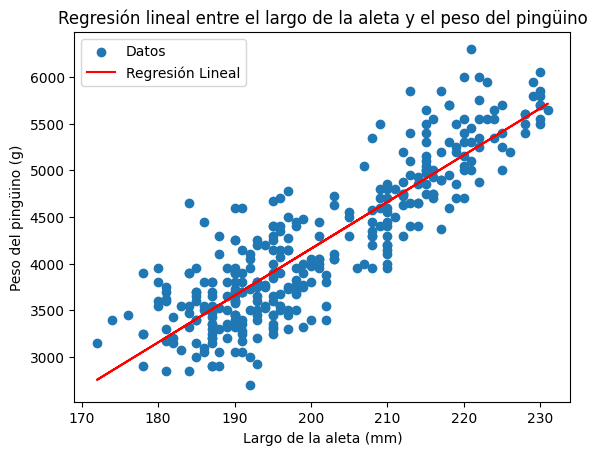

In [16]:
import statsmodels.api as sm

#Definir las variables predictoras (X) y la variable de respuesta (y)
X = data["flipper_length_mm"]
y = data["body_mass_g"]

# Agregar una constante al predictor (intercepto)
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Obtener los resultados del modelo
results = model.summary()

# Imprimir los resultados
print(results)

# Graficar la regresión lineal
plt.scatter(data["flipper_length_mm"], data["body_mass_g"], label="Datos")
plt.plot(data["flipper_length_mm"], model.predict(X), color='red', label="Regresión Lineal")
plt.title("Regresión lineal entre el largo de la aleta y el peso del pingüino")
plt.xlabel("Largo de la aleta (mm)")
plt.ylabel("Peso del pingüino (g)")
plt.legend()
plt.show()

